# Importing libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

# Set options

In [6]:
pd.options.display.max_columns=None
pd.options.display.max_rows=None

# Read Data

In [7]:
data=pd.read_csv('E:\Portfolio projects\Employee performance and attrition\Dataset\HR-Employee-Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [8]:
data.shape

(1470, 35)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# Understanding data

In [10]:
#converting numerical variables to catgorical variables

cols=['Education','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','WorkLifeBalance']
data[cols]=data[cols].astype('object')

In [11]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                   object
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction     object
Gender                      object
HourlyRate                   int64
JobInvolvement              object
JobLevel                    object
JobRole                     object
JobSatisfaction             object
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating           object
RelationshipSatisfaction    object
StandardHours                int64
StockOptionLevel            object
TotalWorkingYears   

In [12]:
#statistical summary of numerical of variables

data.describe()

,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,1.0,1024.865306,65.891156,6502.931293,14313.103401,2.693197,15.209524,80.0,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,0.0,602.024335,20.329428,4707.956783,7117.786044,2.498009,3.659938,0.0,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.0,1.000000,30.000000,1009.000000,2094.000000,0.000000,11.000000,80.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,1.0,491.250000,48.000000,2911.000000,8047.000000,1.000000,12.000000,80.0,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,1.0,1020.500000,66.000000,4919.000000,14235.500000,2.000000,14.000000,80.0,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,1.0,1555.750000,83.750000,8379.000000,20461.500000,4.000000,18.000000,80.0,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,1.0,2068.000000,100.000000,19999.000000,26999.000000,9.000000,25.000000,80.0,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


In [13]:
data.describe(include='object')

,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,Over18,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance
count,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,5,6,4,2,4,5,9,4,3,1,2,2,4,4,4
top,No,Travel_Rarely,Research & Development,3,Life Sciences,3,Male,3,1,Sales Executive,4,Married,Y,No,3,3,0,3
freq,1233,1043,961,572,606,453,882,868,543,326,459,673,1470,1054,1244,459,631,893


In [14]:
data['Over18'].unique()

array(['Y'], dtype=object)

In [15]:
data['StandardHours'].unique()

array([80], dtype=int64)

In [16]:
data['EmployeeCount'].unique()

array([1], dtype=int64)

In [17]:
#dropping Over18,StandardHours,EmployeeCount

data.drop(['Over18','StandardHours','EmployeeCount'],axis=1,inplace=True)
data.shape

(1470, 32)

In [18]:
#extracting numerical and categorical variables

numerical=data.select_dtypes(include=np.number)
categorical=data.select_dtypes(include='object')

print(categorical.shape)
print(numerical.shape)

(1470, 17)
(1470, 15)


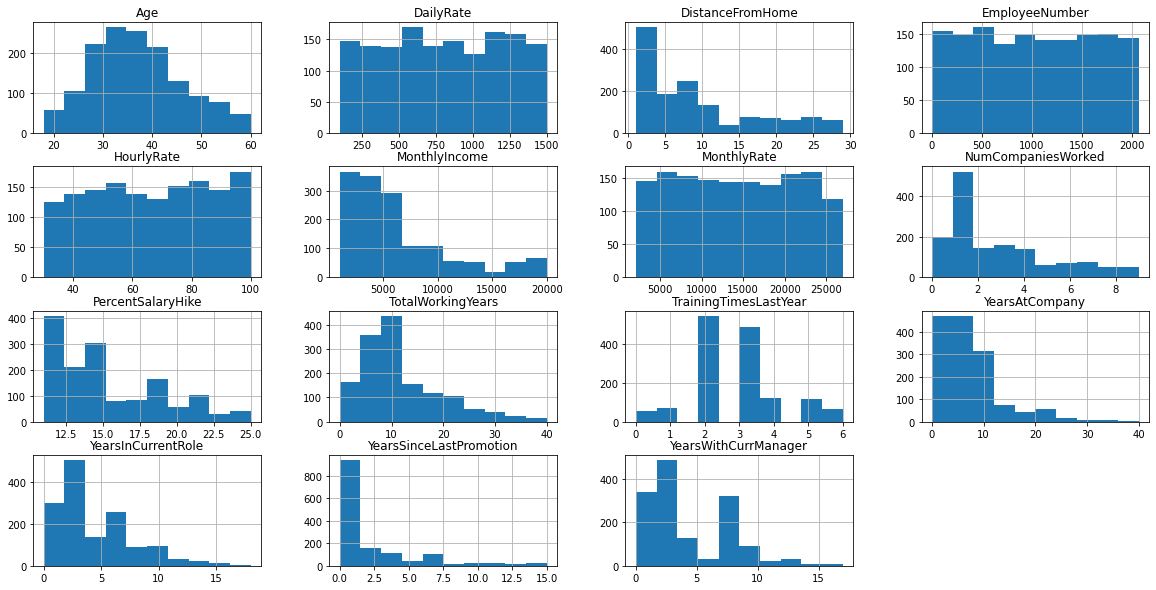

In [19]:
#visualizing the distribution of numerical variables
data.hist(figsize=(20,10))
plt.show()

C:\Users\Reby Varghese\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Reby Varghese\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Reby Varghese\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\User

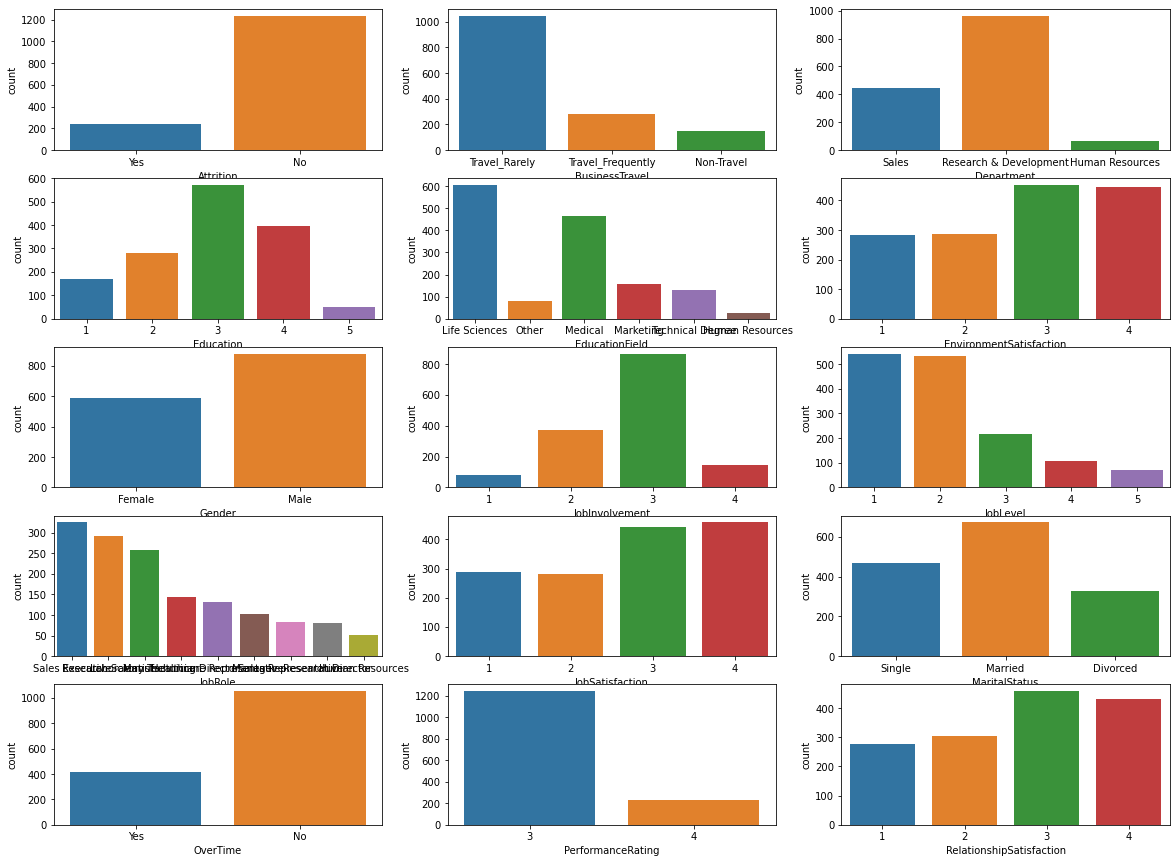

In [20]:
#analyzing the distribution of categorical variables

fig, ax=plt.subplots(nrows=5,ncols=3,figsize=(20,15))
for category,ax in zip(categorical,ax.flatten()):
    sns.countplot(data[category],ax=ax,data=data)
    

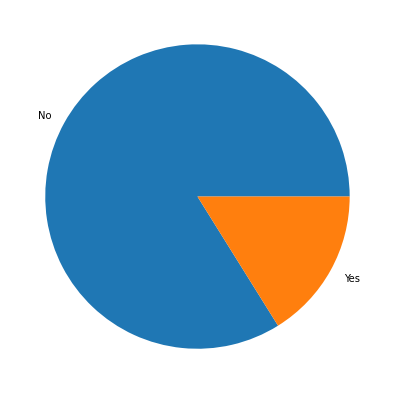

In [21]:
#analyzing the distribution of target variable

target=data.groupby('Attrition')['Attrition'].count()
fig = plt.figure(figsize =(10, 7))
plt.pie(target,labels=['No','Yes'])
plt.show()

# Exploratory Data Analysis

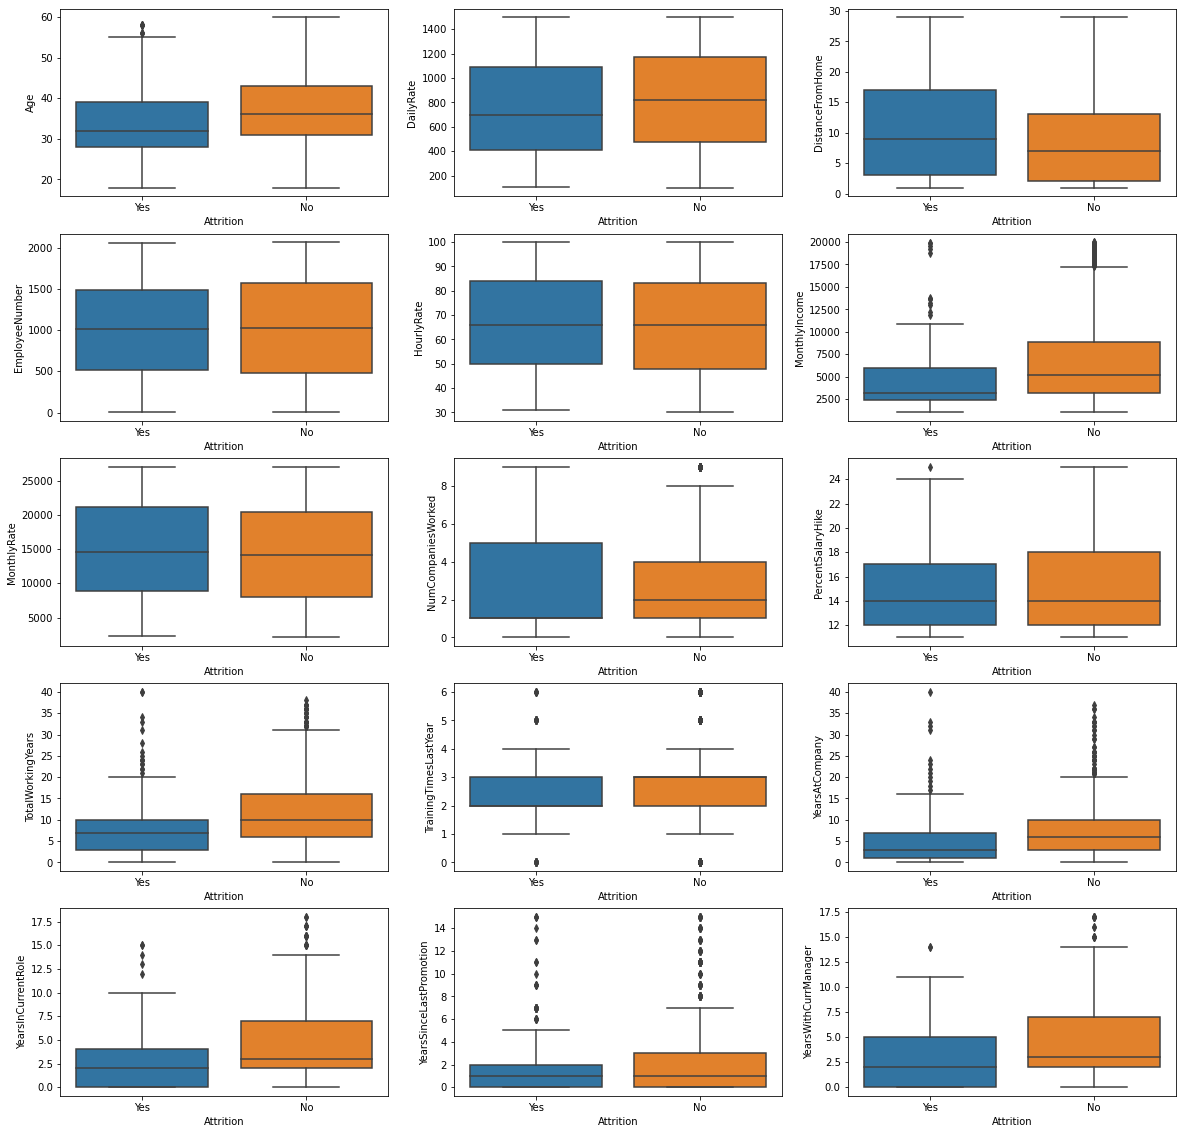

In [22]:
#analyzing the distribution of numerical to the categorical variables

fig, ax=plt.subplots(nrows=5,ncols=3,figsize=(20,20))
for num,ax in zip(numerical,ax.flatten()):
    sns.boxplot(y=data[num],x=data['Attrition'],ax=ax,data=data)

C:\Users\Reby Varghese\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Reby Varghese\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Reby Varghese\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\User

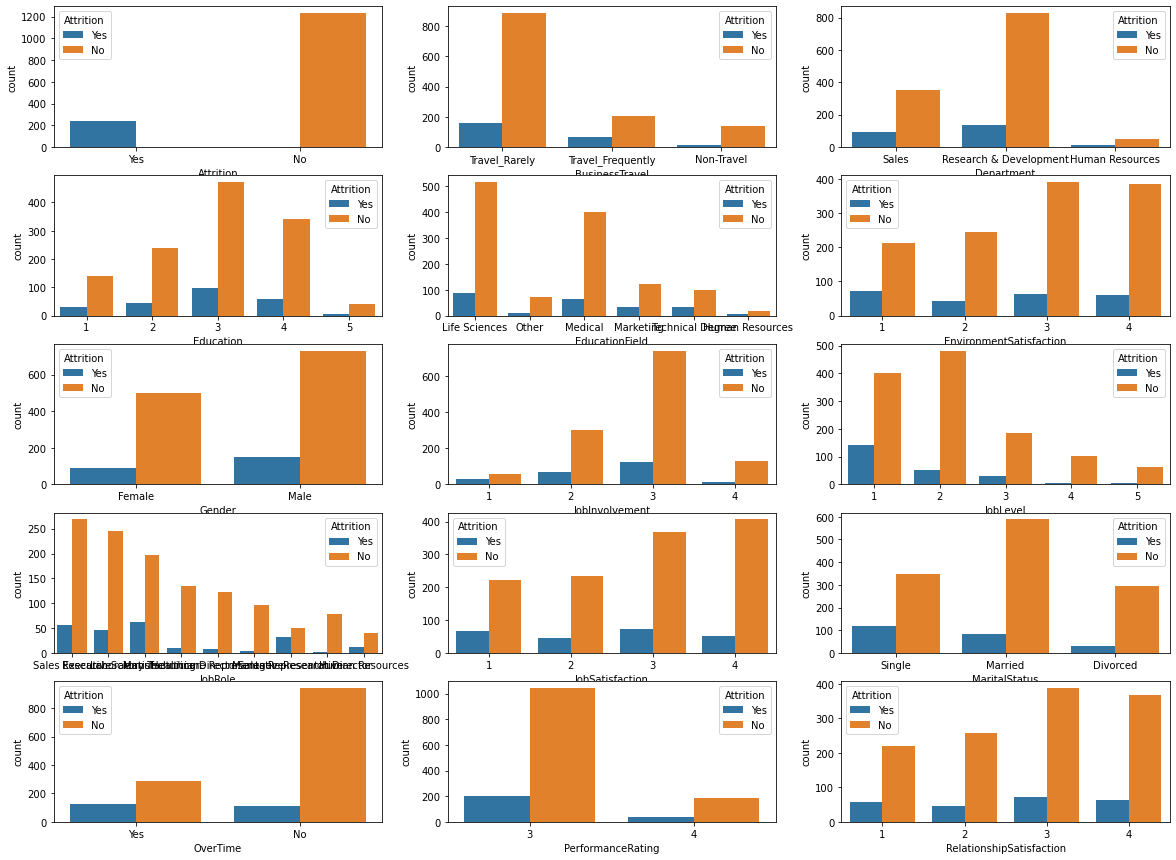

In [23]:
fig, ax=plt.subplots(nrows=5,ncols=3,figsize=(20,15))
for category,ax in zip(categorical,ax.flatten()):
    sns.countplot(data[category],hue='Attrition',ax=ax,data=data)
    

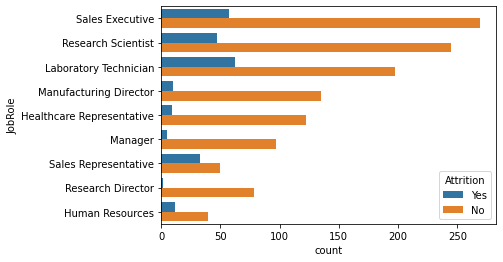

In [24]:
sns.countplot(y='JobRole',data=data,hue='Attrition',orient='h')

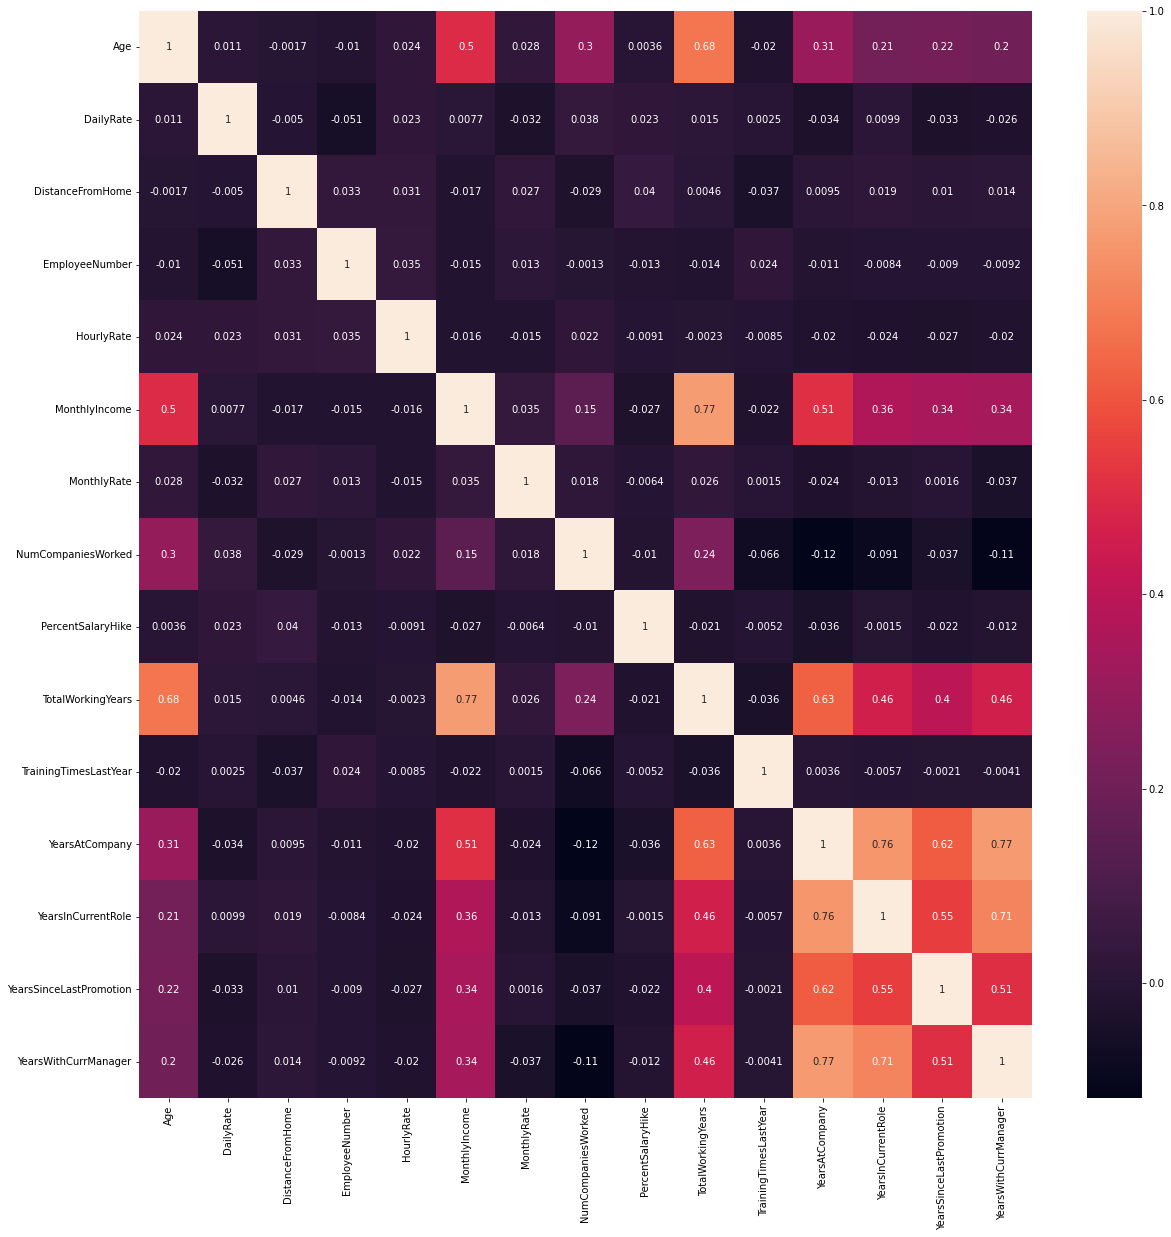

In [25]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)

# Multivariate Analysis

### Age V/S Attrition

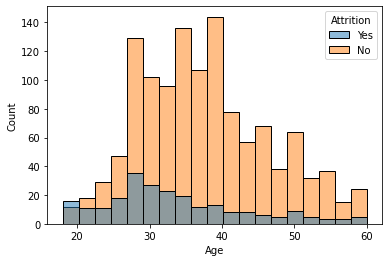

In [26]:
sns.histplot(x='Age' ,hue='Attrition' , data=data);

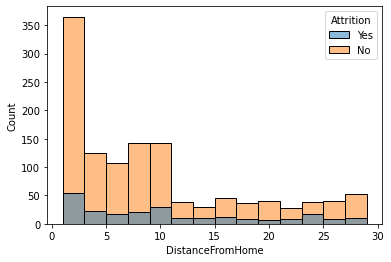

In [27]:
sns.histplot(x='DistanceFromHome',hue='Attrition',data=data)

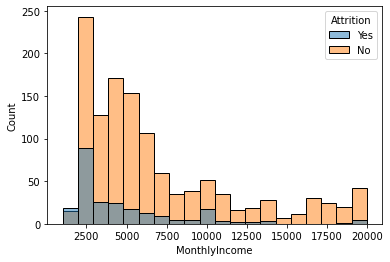

In [28]:
sns.histplot(x='MonthlyIncome',hue='Attrition',data=data)

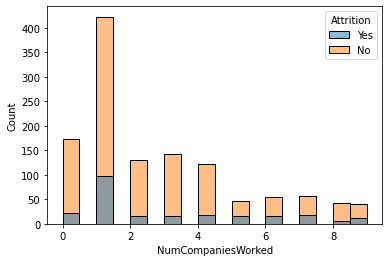

In [29]:
sns.histplot(x='NumCompaniesWorked',hue='Attrition',data=data)

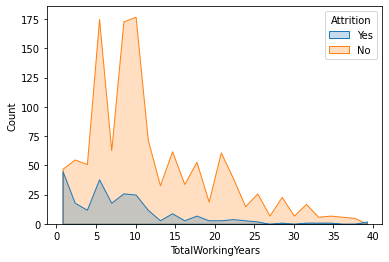

In [30]:
sns.histplot(x='TotalWorkingYears',hue='Attrition', data=data, element='poly')

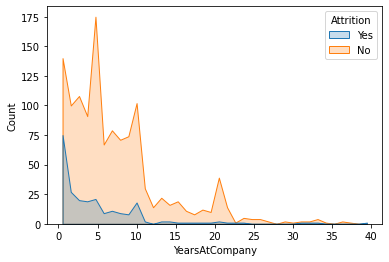

In [31]:
yeas_at_company=sns.histplot(x='YearsAtCompany',data=data,hue='Attrition', element='poly')
plt.savefig('yearsatcompany.png')

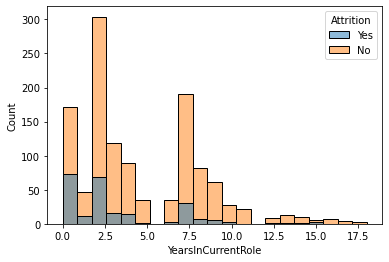

In [32]:
sns.histplot(x='YearsInCurrentRole',data=data,hue='Attrition')

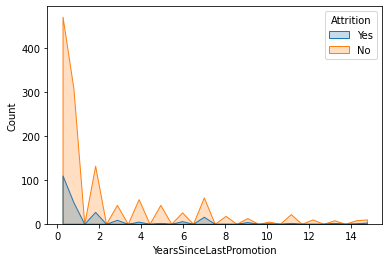

In [33]:
sns.histplot(x='YearsSinceLastPromotion',data=data,hue='Attrition', element='poly')

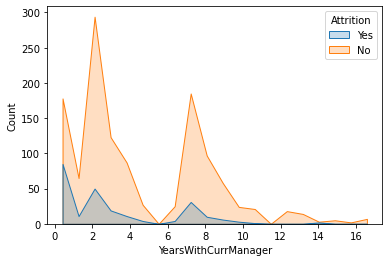

In [34]:
sns.histplot(x='YearsWithCurrManager',data=data,hue='Attrition', element='poly')

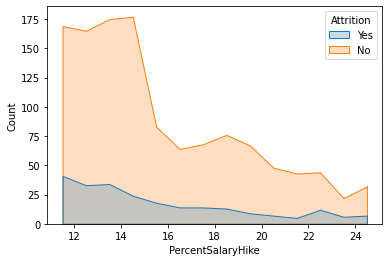

In [35]:
sns.histplot(x='PercentSalaryHike',data=data,hue='Attrition', element='poly')

In [36]:
value_1=pd.crosstab(index=data['BusinessTravel'], columns=data['Attrition'])
value_1

Attrition,No,Yes
BusinessTravel,,
Non-Travel,138,12
Travel_Frequently,208,69
Travel_Rarely,887,156


In [37]:
from scipy import stats
feat_1=stats.chi2_contingency(value_1)[0:3]
feat_1


(24.182413685655174, 5.608614476449931e-06, 2)

In [38]:
chi_test=pd.DataFrame(feat_1,columns=['Business Travel'],index=['chi_test','p-value','dof'])
chi_test

,Business Travel
chi_test,24.182414
p-value,0.000006
dof,2.000000


In [39]:
value_2=pd.crosstab(index=data['Attrition'], columns=data['Department'])
value_2

Department,Human Resources,Research & Development,Sales
Attrition,,,
No,51,828,354
Yes,12,133,92


In [40]:
test_2=stats.chi2_contingency(value_2)[0:3]
chi_test_2=pd.DataFrame(test_2,columns=['Department'],index=['chi_test','p-value','dof'])
chi_test['Department']=chi_test_2
chi_test

,Business Travel,Department
chi_test,24.182414,10.796007
p-value,0.000006,0.004526
dof,2.000000,2.000000


In [41]:
value_3=pd.crosstab(data['Attrition'], data['Education'])
value_3

Education,1,2,3,4,5
Attrition,,,,,
No,139,238,473,340,43
Yes,31,44,99,58,5


In [42]:
test_3=stats.chi2_contingency(value_3)[0:3]
chi_test_3=pd.DataFrame(test_3,columns=['Educationl'],index=['chi_test','p-value','dof'])
chi_test['Education']=chi_test_3
chi_test

,Business Travel,Department,Education
chi_test,24.182414,10.796007,3.073961
p-value,0.000006,0.004526,0.545525
dof,2.000000,2.000000,4.000000


In [43]:
value_4=pd.crosstab(data['Attrition'], data['EducationField'])
value_4

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree
Attrition,,,,,,
No,20,517,124,401,71,100
Yes,7,89,35,63,11,32


In [44]:
test_4=stats.chi2_contingency(value_4)[0:3]
chi_test_4=pd.DataFrame(feat_1,columns=['Education Field'],index=['chi_test','p-value','dof'])
chi_test['Education Field']=chi_test_4
chi_test

,Business Travel,Department,Education,Education Field
chi_test,24.182414,10.796007,3.073961,24.182414
p-value,0.000006,0.004526,0.545525,0.000006
dof,2.000000,2.000000,4.000000,2.000000


In [45]:
value_5=pd.crosstab(data['Attrition'], data['EnvironmentSatisfaction'])
value_5

EnvironmentSatisfaction,1,2,3,4
Attrition,,,,
No,212,244,391,386
Yes,72,43,62,60


In [46]:
test_5=stats.chi2_contingency(value_5)[0:3]
chi_test_5=pd.DataFrame(test_5,columns=['Environment Satisfaction'],index=['chi_test','p-value','dof'])
chi_test['Environment Satisfaction']=chi_test_5
chi_test

,Business Travel,Department,Education,Education Field,Environment Satisfaction
chi_test,24.182414,10.796007,3.073961,24.182414,22.503881
p-value,0.000006,0.004526,0.545525,0.000006,0.000051
dof,2.000000,2.000000,4.000000,2.000000,3.000000


In [47]:
value_6=pd.crosstab(data['Attrition'], data['Gender'])
value_6

Gender,Female,Male
Attrition,,
No,501,732
Yes,87,150


In [48]:
test_6=stats.chi2_contingency(value_6)[0:3]
chi_test_6=pd.DataFrame(test_6,columns=['Gender'],index=['chi_test','p-value','dof'])
chi_test['Gender']=chi_test_6
chi_test

,Business Travel,Department,Education,Education Field,Environment Satisfaction,Gender
chi_test,24.182414,10.796007,3.073961,24.182414,22.503881,1.116967
p-value,0.000006,0.004526,0.545525,0.000006,0.000051,0.290572
dof,2.000000,2.000000,4.000000,2.000000,3.000000,1.000000


In [49]:
value_7=pd.crosstab(data['Attrition'], data['JobInvolvement'])
value_7

JobInvolvement,1,2,3,4
Attrition,,,,
No,55,304,743,131
Yes,28,71,125,13


In [50]:
test_7=stats.chi2_contingency(value_7)[0:3]
chi_test_7=pd.DataFrame(test_7,columns=['Job Involvemnet'],index=['chi_test','p-value','dof'])
chi_test['Job Involvement']=chi_test_7
chi_test

,Business Travel,Department,Education,Education Field,Environment Satisfaction,Gender,Job Involvement
chi_test,24.182414,10.796007,3.073961,24.182414,22.503881,1.116967,28.492021
p-value,0.000006,0.004526,0.545525,0.000006,0.000051,0.290572,0.000003
dof,2.000000,2.000000,4.000000,2.000000,3.000000,1.000000,3.000000


In [51]:
value_8=pd.crosstab(data['Attrition'], data['JobLevel'])


In [52]:
test_8=stats.chi2_contingency(value_8)[0:3]
chi_test_8=pd.DataFrame(test_8,columns=['Job level'],index=['chi_test','p-value','dof'])
chi_test['Job Level']=chi_test_8
chi_test

,Business Travel,Department,Education,Education Field,Environment Satisfaction,Gender,Job Involvement,Job Level
chi_test,24.182414,10.796007,3.073961,24.182414,22.503881,1.116967,28.492021,7.252901e+01
p-value,0.000006,0.004526,0.545525,0.000006,0.000051,0.290572,0.000003,6.634685e-15
dof,2.000000,2.000000,4.000000,2.000000,3.000000,1.000000,3.000000,4.000000e+00


In [53]:
value_15=pd.crosstab(data['Attrition'], data['JobRole'])
value_15

JobRole,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
Attrition,,,,,,,,,
No,122,40,197,97,135,78,245,269,50
Yes,9,12,62,5,10,2,47,57,33


In [54]:
test_15=stats.chi2_contingency(value_15)[0:3]
chi_test_15=pd.DataFrame(test_15,columns=['Job Role'],index=['chi_test','p-value','dof'])
chi_test['Job Role']=chi_test_15
chi_test

,Business Travel,Department,Education,Education Field,Environment Satisfaction,Gender,Job Involvement,Job Level,Job Role
chi_test,24.182414,10.796007,3.073961,24.182414,22.503881,1.116967,28.492021,7.252901e+01,8.619025e+01
p-value,0.000006,0.004526,0.545525,0.000006,0.000051,0.290572,0.000003,6.634685e-15,2.752482e-15
dof,2.000000,2.000000,4.000000,2.000000,3.000000,1.000000,3.000000,4.000000e+00,8.000000e+00


In [55]:
value_9=pd.crosstab(data['Attrition'], data['JobSatisfaction'])
value_9

JobSatisfaction,1,2,3,4
Attrition,,,,
No,223,234,369,407
Yes,66,46,73,52


In [56]:
test_9=stats.chi2_contingency(value_9)[0:3]
chi_test_9=pd.DataFrame(test_9,columns=['Job Satisfaction'],index=['chi_test','p-value','dof'])
chi_test['Job Satisfaction']=chi_test_9
chi_test

,Business Travel,Department,Education,Education Field,Environment Satisfaction,Gender,Job Involvement,Job Level,Job Role,Job Satisfaction
chi_test,24.182414,10.796007,3.073961,24.182414,22.503881,1.116967,28.492021,7.252901e+01,8.619025e+01,17.505077
p-value,0.000006,0.004526,0.545525,0.000006,0.000051,0.290572,0.000003,6.634685e-15,2.752482e-15,0.000556
dof,2.000000,2.000000,4.000000,2.000000,3.000000,1.000000,3.000000,4.000000e+00,8.000000e+00,3.000000


In [57]:
value_10=pd.crosstab(data['Attrition'], data['MaritalStatus'])
value_10

MaritalStatus,Divorced,Married,Single
Attrition,,,
No,294,589,350
Yes,33,84,120


In [58]:
test_10=stats.chi2_contingency(value_10)[0:3]
chi_test_10=pd.DataFrame(test_10,columns=['Matital Status'],index=['chi_test','p-value','dof'])
chi_test['Marital Status']=chi_test_10
chi_test

,Business Travel,Department,Education,Education Field,Environment Satisfaction,Gender,Job Involvement,Job Level,Job Role,Job Satisfaction,Marital Status
chi_test,24.182414,10.796007,3.073961,24.182414,22.503881,1.116967,28.492021,7.252901e+01,8.619025e+01,17.505077,4.616368e+01
p-value,0.000006,0.004526,0.545525,0.000006,0.000051,0.290572,0.000003,6.634685e-15,2.752482e-15,0.000556,9.455511e-11
dof,2.000000,2.000000,4.000000,2.000000,3.000000,1.000000,3.000000,4.000000e+00,8.000000e+00,3.000000,2.000000e+00


In [59]:
value_11=pd.crosstab(data['Attrition'], data['OverTime'])
value_11

OverTime,No,Yes
Attrition,,
No,944,289
Yes,110,127


In [60]:
test_11=stats.chi2_contingency(value_11)[0:3]
chi_test_11=pd.DataFrame(test_11,columns=['Overtime'],index=['chi_test','p-value','dof'])
chi_test['OverTime']=chi_test_11
chi_test

,Business Travel,Department,Education,Education Field,Environment Satisfaction,Gender,Job Involvement,Job Level,Job Role,Job Satisfaction,Marital Status,OverTime
chi_test,24.182414,10.796007,3.073961,24.182414,22.503881,1.116967,28.492021,7.252901e+01,8.619025e+01,17.505077,4.616368e+01,8.756429e+01
p-value,0.000006,0.004526,0.545525,0.000006,0.000051,0.290572,0.000003,6.634685e-15,2.752482e-15,0.000556,9.455511e-11,8.158424e-21
dof,2.000000,2.000000,4.000000,2.000000,3.000000,1.000000,3.000000,4.000000e+00,8.000000e+00,3.000000,2.000000e+00,1.000000e+00


In [61]:
value_12=pd.crosstab(data['Attrition'], data['PerformanceRating'])
value_12

PerformanceRating,3,4
Attrition,,
No,1044,189
Yes,200,37


In [62]:
test_12=stats.chi2_contingency(value_12)[0:3]
chi_test_12=pd.DataFrame(test_12,columns=['Performance Rating'],index=['chi_test','p-value','dof'])
chi_test['Performance Rating']=chi_test_12


In [63]:
value_13=pd.crosstab(data['Attrition'], data['RelationshipSatisfaction'])
value_13

RelationshipSatisfaction,1,2,3,4
Attrition,,,,
No,219,258,388,368
Yes,57,45,71,64


In [64]:
test_13=stats.chi2_contingency(value_13)[0:3]
chi_test_13=pd.DataFrame(test_13,columns=['Relationship Satisfaction'],index=['chi_test','p-value','dof'])
chi_test['RelationShip satisfaction']=chi_test_13
chi_test

,Business Travel,Department,Education,Education Field,Environment Satisfaction,Gender,Job Involvement,Job Level,Job Role,Job Satisfaction,Marital Status,OverTime,Performance Rating,RelationShip satisfaction
chi_test,24.182414,10.796007,3.073961,24.182414,22.503881,1.116967,28.492021,7.252901e+01,8.619025e+01,17.505077,4.616368e+01,8.756429e+01,0.000155,5.241068
p-value,0.000006,0.004526,0.545525,0.000006,0.000051,0.290572,0.000003,6.634685e-15,2.752482e-15,0.000556,9.455511e-11,8.158424e-21,0.990075,0.154972
dof,2.000000,2.000000,4.000000,2.000000,3.000000,1.000000,3.000000,4.000000e+00,8.000000e+00,3.000000,2.000000e+00,1.000000e+00,1.000000,3.000000


In [65]:
value_14=pd.crosstab(data['Attrition'], data['StockOptionLevel'])
value_14

StockOptionLevel,0,1,2,3
Attrition,,,,
No,477,540,146,70
Yes,154,56,12,15


In [66]:
test_14=stats.chi2_contingency(value_14)[0:3]
chi_test_14=pd.DataFrame(test_14,columns=['Stock option level'],index=['chi_test','p-value','dof'])
chi_test['Stock option Level']=chi_test_14
chi_test

,Business Travel,Department,Education,Education Field,Environment Satisfaction,Gender,Job Involvement,Job Level,Job Role,Job Satisfaction,Marital Status,OverTime,Performance Rating,RelationShip satisfaction,Stock option Level
chi_test,24.182414,10.796007,3.073961,24.182414,22.503881,1.116967,28.492021,7.252901e+01,8.619025e+01,17.505077,4.616368e+01,8.756429e+01,0.000155,5.241068,6.059830e+01
p-value,0.000006,0.004526,0.545525,0.000006,0.000051,0.290572,0.000003,6.634685e-15,2.752482e-15,0.000556,9.455511e-11,8.158424e-21,0.990075,0.154972,4.379390e-13
dof,2.000000,2.000000,4.000000,2.000000,3.000000,1.000000,3.000000,4.000000e+00,8.000000e+00,3.000000,2.000000e+00,1.000000e+00,1.000000,3.000000,3.000000e+00


In [67]:
value_16=pd.crosstab(data['Attrition'], data['WorkLifeBalance'])
value_16

WorkLifeBalance,1,2,3,4
Attrition,,,,
No,55,286,766,126
Yes,25,58,127,27


In [68]:
test_16=stats.chi2_contingency(value_15)[0:3]
chi_test_16=pd.DataFrame(test_16,columns=['WorkLifeBAlance'],index=['chi_test','p-value','dof'])
chi_test['WorkLifeBalance']=chi_test_16
chi_test

,Business Travel,Department,Education,Education Field,Environment Satisfaction,Gender,Job Involvement,Job Level,Job Role,Job Satisfaction,Marital Status,OverTime,Performance Rating,RelationShip satisfaction,Stock option Level,WorkLifeBalance
chi_test,24.182414,10.796007,3.073961,24.182414,22.503881,1.116967,28.492021,7.252901e+01,8.619025e+01,17.505077,4.616368e+01,8.756429e+01,0.000155,5.241068,6.059830e+01,8.619025e+01
p-value,0.000006,0.004526,0.545525,0.000006,0.000051,0.290572,0.000003,6.634685e-15,2.752482e-15,0.000556,9.455511e-11,8.158424e-21,0.990075,0.154972,4.379390e-13,2.752482e-15
dof,2.000000,2.000000,4.000000,2.000000,3.000000,1.000000,3.000000,4.000000e+00,8.000000e+00,3.000000,2.000000e+00,1.000000e+00,1.000000,3.000000,3.000000e+00,8.000000e+00


In [69]:

chi_test

,Business Travel,Department,Education,Education Field,Environment Satisfaction,Gender,Job Involvement,Job Level,Job Role,Job Satisfaction,Marital Status,OverTime,Performance Rating,RelationShip satisfaction,Stock option Level,WorkLifeBalance
chi_test,24.182414,10.796007,3.073961,24.182414,22.503881,1.116967,28.492021,7.252901e+01,8.619025e+01,17.505077,4.616368e+01,8.756429e+01,0.000155,5.241068,6.059830e+01,8.619025e+01
p-value,0.000006,0.004526,0.545525,0.000006,0.000051,0.290572,0.000003,6.634685e-15,2.752482e-15,0.000556,9.455511e-11,8.158424e-21,0.990075,0.154972,4.379390e-13,2.752482e-15
dof,2.000000,2.000000,4.000000,2.000000,3.000000,1.000000,3.000000,4.000000e+00,8.000000e+00,3.000000,2.000000e+00,1.000000e+00,1.000000,3.000000,3.000000e+00,8.000000e+00


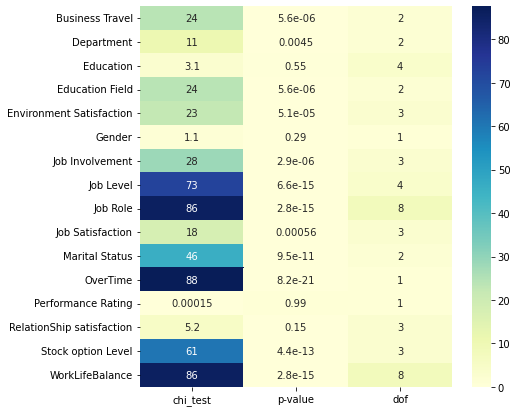

In [74]:
plt.figure(figsize=(7,7))
testmap=sns.heatmap(chi_test.T, annot=True,cmap="YlGnBu")
plt.show()


## Data preprocessing


In [75]:
#label encoding the target variables


data['Attrition']=data['Attrition'].replace('No',0).astype('category')
data['Attrition']=data['Attrition'].replace('Yes',1).astype('category')
data['Attrition'].unique()

[1, 0]
Categories (2, int64): [0, 1]

In [76]:
#extracting dependent and independent variables

X=data.drop('Attrition', axis=1)
Y=data['Attrition']

In [77]:
encoder=LabelEncoder()
numerical=data.select_dtypes(include=np.number)
categorical=data.select_dtypes(include='object')

categorical['BusinessTravel']=encoder.fit_transform(categorical['BusinessTravel'])
categorical['Department']=encoder.fit_transform(categorical['Department'])
categorical['EducationField']=encoder.fit_transform(categorical['EducationField'])
categorical['Gender']=encoder.fit_transform(categorical['Gender'])
categorical['JobRole']=encoder.fit_transform(categorical['JobRole'])
categorical['MaritalStatus']=encoder.fit_transform(categorical['MaritalStatus'])
categorical['OverTime']=encoder.fit_transform(categorical['OverTime'])


<ipython-input-77-c3b05a05c0a7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['BusinessTravel']=encoder.fit_transform(categorical['BusinessTravel'])
<ipython-input-77-c3b05a05c0a7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Department']=encoder.fit_transform(categorical['Department'])
<ipython-input-77-c3b05a05c0a7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [78]:
data_2=pd.concat([numerical,categorical],axis=1)
data_2.head()

,Age,DailyRate,DistanceFromHome,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance
0,41,1102,1,1,94,5993,19479,8,11,8,0,6,4,0,5,2,2,2,1,2,0,3,2,7,4,2,1,3,1,0,1
1,49,279,8,2,61,5130,24907,1,23,10,3,10,7,1,7,1,1,1,1,3,1,2,2,6,2,1,0,4,4,1,3
2,37,1373,2,4,92,2090,2396,6,15,7,3,0,0,0,0,2,1,2,4,4,1,2,1,2,3,2,1,3,2,0,3
3,33,1392,3,5,56,2909,23159,1,11,8,3,8,7,3,0,1,1,4,1,4,0,3,1,6,3,1,1,3,3,0,3
4,27,591,2,7,40,3468,16632,9,12,6,3,2,2,2,2,2,1,1,3,1,1,3,1,2,2,1,0,3,4,1,3


In [79]:
X=data_2.copy()
Y=data['Attrition']

In [80]:
#dfeature selection using random forest classifier

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)
rf=RandomForestClassifier(n_estimators=1000,random_state=10,n_jobs=-1)
rf.fit(X_train,Y_train)

sfm=SelectFromModel(rf,threshold=0.01)
sfm.fit(X_train,Y_train)


SelectFromModel(estimator=RandomForestClassifier(n_estimators=1000, n_jobs=-1,
                                                 random_state=10),
                threshold=0.01)

In [81]:
selected_feat= X_train.columns[(sfm.get_support())]
print(selected_feat)
len(selected_feat)

Index(['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeNumber', 'HourlyRate',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BusinessTravel', 'Department', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime',
       'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance'],
      dtype='object')


29

In [82]:
selected_features=['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeNumber', 'HourlyRate',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BusinessTravel',
       'JobInvolvement', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'OverTime',
       'StockOptionLevel', 'WorkLifeBalance']

data_2=data[selected_features]
data_2.head()

,Age,DailyRate,DistanceFromHome,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,OverTime,StockOptionLevel,WorkLifeBalance
0,41,1102,1,1,94,5993,19479,8,11,8,0,6,4,0,5,Travel_Rarely,3,Sales Executive,4,Single,Yes,0,1
1,49,279,8,2,61,5130,24907,1,23,10,3,10,7,1,7,Travel_Frequently,2,Research Scientist,2,Married,No,1,3
2,37,1373,2,4,92,2090,2396,6,15,7,3,0,0,0,0,Travel_Rarely,2,Laboratory Technician,3,Single,Yes,0,3
3,33,1392,3,5,56,2909,23159,1,11,8,3,8,7,3,0,Travel_Frequently,3,Research Scientist,3,Married,Yes,0,3
4,27,591,2,7,40,3468,16632,9,12,6,3,2,2,2,2,Travel_Rarely,3,Laboratory Technician,2,Married,No,1,3


In [83]:
data_2.dtypes

Age                         int64
DailyRate                   int64
DistanceFromHome            int64
EmployeeNumber              int64
HourlyRate                  int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
PercentSalaryHike           int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
BusinessTravel             object
JobInvolvement             object
JobRole                    object
JobSatisfaction            object
MaritalStatus              object
OverTime                   object
StockOptionLevel           object
WorkLifeBalance            object
dtype: object

In [84]:
data['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [85]:
#one hot encoding the features

numerical=data_2.select_dtypes(include=np.number)
categorical=data_2.select_dtypes(include='object')

dummies=pd.get_dummies(categorical, drop_first=True)
dummy_var=pd.concat([numerical,dummies], axis=1)
dummy_var.head()

,Age,DailyRate,DistanceFromHome,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,41,1102,1,1,94,5993,19479,8,11,8,0,6,4,0,5,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0
1,49,279,8,2,61,5130,24907,1,23,10,3,10,7,1,7,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
2,37,1373,2,4,92,2090,2396,6,15,7,3,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0
3,33,1392,3,5,56,2909,23159,1,11,8,3,8,7,3,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0
4,27,591,2,7,40,3468,16632,9,12,6,3,2,2,2,2,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0


In [86]:
X=dummy_var.copy()
Y=pd.DataFrame(Y)
X.shape

(1470, 40)

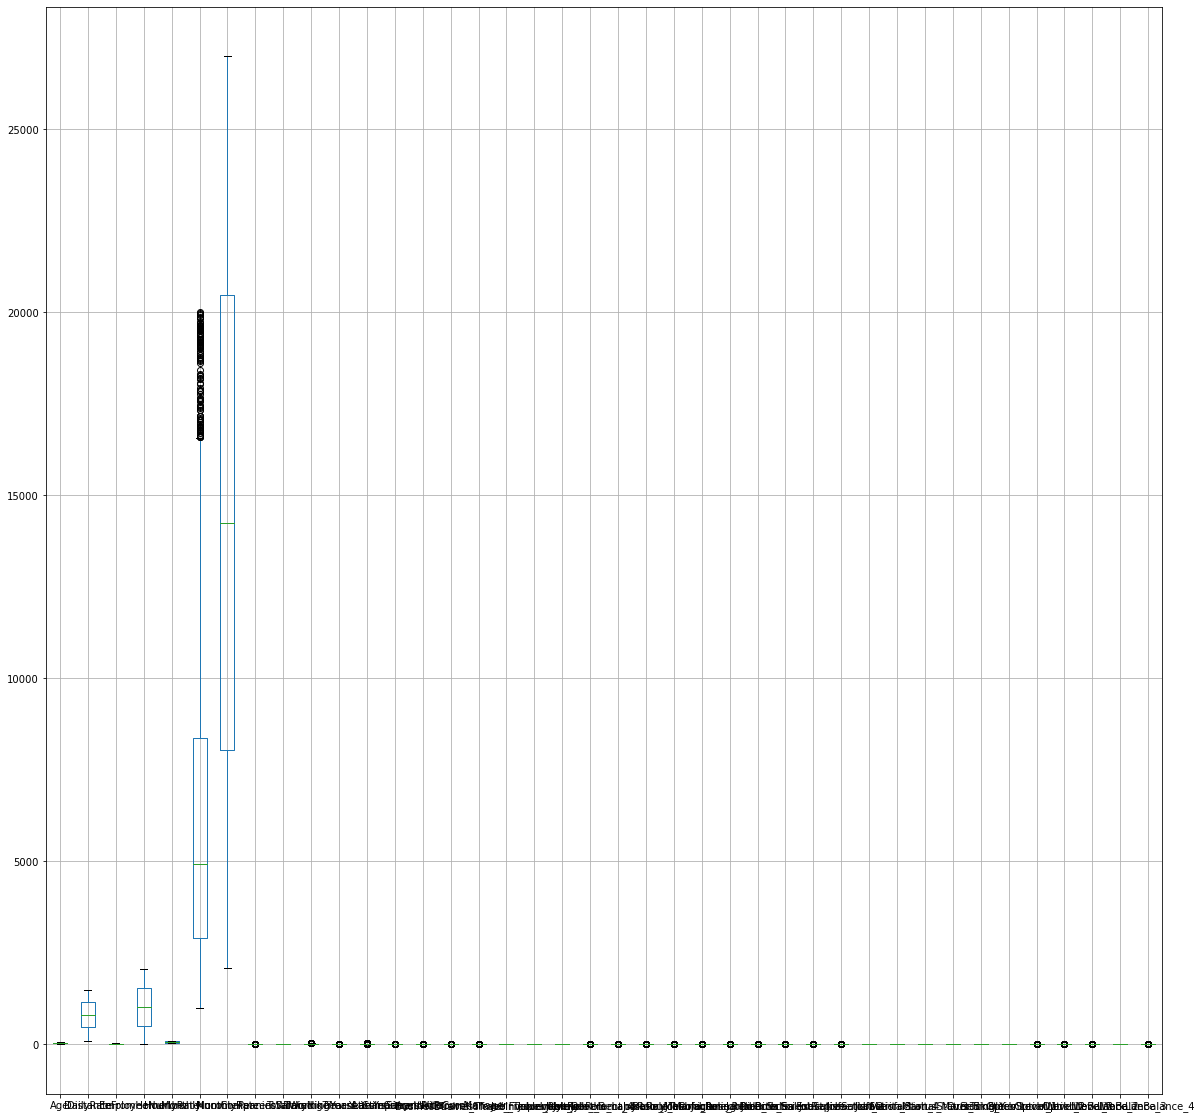

In [87]:
X.boxplot(figsize=(20,20))

In [88]:
# from scipy import stats
# cleaned_data=X[(np.abs(stats.zscore(X)) < 3).all(axis=1)]
# cleaned_data.shape

# Model building

In [89]:
#splitting the data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=10)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1029, 40)
(441, 40)
(1029, 1)
(441, 1)


In [90]:
#feature scaling 

scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [91]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 10)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

print("X_train after oversampling : ", X_train_smote.shape)
print("Y_train after oversampling : ", Y_train_smote.shape)

X_train after oversampling :  (1752, 40)
Y_train after oversampling :  (1752, 1)


In [92]:
Y_train

,Attrition
682,0
1457,0
668,0
411,0
876,0
1183,0
1025,0
1085,1
373,0
20,0


### Logistic Regression

In [93]:
model_1=LogisticRegression()

#evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#hyperparameters
params={
    'solver' : ["newton-cg", "lbfgs", "liblinear"],
    'penalty' : ["l1", "l2", "elasticnet"]
}


#randomizedsearch 
search = RandomizedSearchCV(model_1, params, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)

# execute search
result = search.fit(X_train_smote, Y_train_smote)
# summarize result
print(f'Best Score: {result.best_score_}')
print(f'Best Parameters: {result.best_params_}')

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 9 is smaller than n_iter=500. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Score: 0.7720519480519481
Best Parameters: {'solver': 'liblinear', 'penalty': 'l2'}


C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
150 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check

In [94]:
model_1=LogisticRegression(solver='liblinear')
model_1=model_1.fit(X_train_smote,Y_train_smote)
y_pred=model_1.predict(X_test)
y_pred

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,

In [95]:
print(metrics.confusion_matrix(Y_test,y_pred))

[[271  86]
 [ 20  64]]


In [96]:
print(metrics.classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.76      0.84       357
           1       0.43      0.76      0.55        84

    accuracy                           0.76       441
   macro avg       0.68      0.76      0.69       441
weighted avg       0.84      0.76      0.78       441



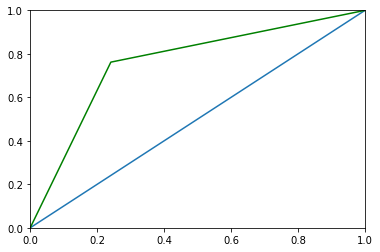

In [97]:
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(Y_test, y_pred)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot([0, 1], [0, 1])
plt.plot(false_positive_rate, true_positive_rate, 'g')

In [98]:
#calculating metrics

results_1={
    'Model' : 'LogisticRegression',
    'Accuracy_Score' : metrics.accuracy_score(Y_test,y_pred),
    'Precison_Score' : metrics.precision_score(Y_test,y_pred),
    'Recall_Score' : metrics.recall_score(Y_test,y_pred),
    'AUC_score' : metrics.roc_auc_score(Y_test,y_pred),
    'F1-Score' : metrics.f1_score(Y_test,y_pred),
    'Kappa_score' : metrics.cohen_kappa_score(Y_test,y_pred)
}

results_1

{'Model': 'LogisticRegression',
 'Accuracy_Score': 0.7596371882086168,
 'Precison_Score': 0.4266666666666667,
 'Recall_Score': 0.7619047619047619,
 'AUC_score': 0.7605042016806722,
 'F1-Score': 0.547008547008547,
 'Kappa_score': 0.4006462035541195}

In [99]:
#tabulate the results

table=pd.DataFrame()
table=table.append(results_1,ignore_index=True)
table

,Model,Accuracy_Score,Precison_Score,Recall_Score,AUC_score,F1-Score,Kappa_score
0,LogisticRegression,0.759637,0.426667,0.761905,0.760504,0.547009,0.400646


### Decision Tree classiifer

In [100]:
dt=DecisionTreeClassifier()
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)

params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

search_dt=GridSearchCV(dt,params,n_jobs=-1,cv=cv)
# execute search
result_2 = search_dt.fit(X_train_smote, Y_train_smote)
# summarize result
print(f'Best Score: {result_2.best_score_}')
print(f'Best Parameters: {result_2.best_params_}')

Best Score: 0.8552132034632035
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5}


In [101]:
model_2=DecisionTreeClassifier(max_depth=result_2.best_params_['max_depth'],min_samples_leaf=result_2.best_params_['min_samples_leaf'],
                                criterion=result_2.best_params_['criterion'],random_state=10)

model_2=model_2.fit(X_train_smote,Y_train_smote)
y_pred_2=model_2.predict(X_test)
y_pred_2

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [102]:
print(metrics.classification_report(Y_train,model_2.predict(X_train)))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       876
           1       0.71      0.73      0.72       153

    accuracy                           0.92      1029
   macro avg       0.83      0.84      0.83      1029
weighted avg       0.92      0.92      0.92      1029



In [103]:
print(metrics.classification_report(Y_test,y_pred_2))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       357
           1       0.39      0.36      0.37        84

    accuracy                           0.77       441
   macro avg       0.62      0.61      0.62       441
weighted avg       0.76      0.77      0.77       441



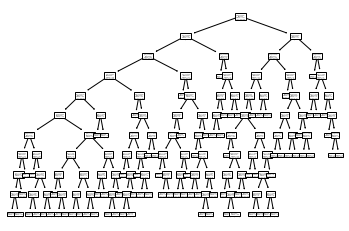

In [104]:
plt.figsize=(200,200)
plot_tree(model_2)
plt.show()

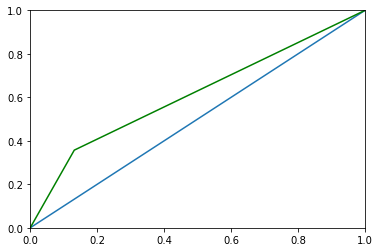

In [105]:
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(Y_test, y_pred_2)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot([0, 1], [0, 1])
plt.plot(false_positive_rate, true_positive_rate, 'g')

In [106]:
#calculating metrics

results_2={
    'Model' : 'DecisionTreeClassifier',
    'Accuracy_Score' : metrics.accuracy_score(Y_test,y_pred_2),
    'Precison_Score' : metrics.precision_score(Y_test,y_pred_2),
    'Recall_Score' : metrics.recall_score(Y_test,y_pred_2),
    'AUC_score' : metrics.roc_auc_score(Y_test,y_pred_2),
    'F1-Score' : metrics.f1_score(Y_test,y_pred_2),
    'Kappa_score' : metrics.cohen_kappa_score(Y_test,y_pred_2)
}

results_2

{'Model': 'DecisionTreeClassifier',
 'Accuracy_Score': 0.7709750566893424,
 'Precison_Score': 0.38961038961038963,
 'Recall_Score': 0.35714285714285715,
 'AUC_score': 0.6127450980392157,
 'F1-Score': 0.3726708074534162,
 'Kappa_score': 0.2329113924050632}

In [107]:
table=table.append(results_2,ignore_index=True)
table

,Model,Accuracy_Score,Precison_Score,Recall_Score,AUC_score,F1-Score,Kappa_score
0,LogisticRegression,0.759637,0.426667,0.761905,0.760504,0.547009,0.400646
1,DecisionTreeClassifier,0.770975,0.389610,0.357143,0.612745,0.372671,0.232911


### RandomForestClassifer

In [108]:
rf=RandomForestClassifier()

#evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [150,200],
    'n_estimators': [1000,800],
    'min_samples_leaf': [3, 5],
    'min_samples_split': [8,12],
    'max_features': [2, 3]
}

#randomizedsearch 
search_rf = GridSearchCV(rf, params, n_jobs=-1, cv=cv)

# execute search
result_3 = search_rf.fit(X_train_smote, Y_train_smote)
# summarize result
print(f'Best Score: {result_3.best_score_}')
print(f'Best Parameters: {result_3.best_params_}')

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best Score: 0.9377683982683982
Best Parameters: {'max_depth': 200, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 1000}


In [109]:
model_3=RandomForestClassifier(n_estimators=result_3.best_params_['n_estimators'],min_samples_leaf=result_3.best_params_['min_samples_leaf'],
                               max_features=result_3.best_params_['max_features'],min_samples_split=result_3.best_params_['min_samples_split'],
                              max_depth=result_3.best_params_['max_depth'])

model_3=model_3.fit(X_train_smote,Y_train_smote)
y_pred_3=model_3.predict(X_test)
y_pred_3

<ipython-input-109-1d34cd9a5a83>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_3=model_3.fit(X_train_smote,Y_train_smote)


array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [110]:
threshold=0.4
predicted_3=model_3.predict_proba(X_test)
predicted_3 = (predicted_3 [:,1] >= threshold).astype('int')
    
print(predicted_3)

[0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0
 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0
 1 0 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 1
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


In [111]:
print(metrics.classification_report(Y_test,predicted_3))  #threshold=0.4

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       357
           1       0.53      0.57      0.55        84

    accuracy                           0.82       441
   macro avg       0.71      0.73      0.72       441
weighted avg       0.83      0.82      0.82       441



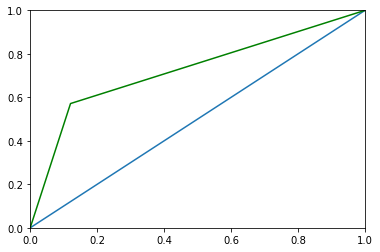

In [112]:
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(Y_test, predicted_3)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot([0, 1], [0, 1])
plt.plot(false_positive_rate, true_positive_rate, 'g')

In [113]:
#calculating metrics

results_3={
    'Model' : 'RandomForestClassifier',
    'Accuracy_Score' : metrics.accuracy_score(Y_test,predicted_3),
    'Precison_Score' : metrics.precision_score(Y_test,predicted_3),
    'Recall_Score' : metrics.recall_score(Y_test,predicted_3),
    'AUC_score' : metrics.roc_auc_score(Y_test,predicted_3),
    'F1-Score' : metrics.f1_score(Y_test,predicted_3),
    'Kappa_score' : metrics.cohen_kappa_score(Y_test,predicted_3)
}

results_3

{'Model': 'RandomForestClassifier',
 'Accuracy_Score': 0.8208616780045351,
 'Precison_Score': 0.5274725274725275,
 'Recall_Score': 0.5714285714285714,
 'AUC_score': 0.7254901960784313,
 'F1-Score': 0.5485714285714285,
 'Kappa_score': 0.43705463182897863}

In [114]:
table=table.append(results_3,ignore_index=True)
table

,Model,Accuracy_Score,Precison_Score,Recall_Score,AUC_score,F1-Score,Kappa_score
0,LogisticRegression,0.759637,0.426667,0.761905,0.760504,0.547009,0.400646
1,DecisionTreeClassifier,0.770975,0.389610,0.357143,0.612745,0.372671,0.232911
2,RandomForestClassifier,0.820862,0.527473,0.571429,0.725490,0.548571,0.437055


### KNNClassifier

In [115]:
model_4=KNeighborsClassifier()
params={
    'n_neighbors' : np.arange(1,24,2),
    'metric': ['hamming','euclidean','manhattan','Chebyshev']
}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
search_knn=GridSearchCV(estimator=model_4,param_grid=params, cv=cv,scoring='accuracy')
result_4 = search_knn.fit(X_train_smote, Y_train_smote)
# summarize result
print(f'Best Score: {result_4.best_score_}')
print(f'Best Parameters: {result_4.best_params_}')

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

Best Score: 0.9313214285714285
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 1}


C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

In [116]:
for i in np.arange(1,30,2):
    

    knn = KNeighborsClassifier(i, metric = 'manhattan')

    score = cross_val_score(knn, X_train_smote, Y_train_smote, cv = 5)

    score = score.mean()
    
    
    print(f'{i} == {score}')

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

1 == 0.9235115995115996


C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

3 == 0.8858412698412698


C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

5 == 0.8612910052910054


C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

7 == 0.8424501424501425
9 == 0.8298966218966219
11 == 0.8236174196174197


C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

13 == 0.8156223036223036


C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

15 == 0.8156125356125357


C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

17 == 0.8116174196174196


C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

19 == 0.8121888481888483


C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

21 == 0.80191452991453


C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

23 == 0.7950606430606431


C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

25 == 0.7916385836385835


C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

27 == 0.7836564916564915
29 == 0.7785152625152626


In [117]:
model_4=KNeighborsClassifier(n_neighbors=1)
model_4.fit(X_train_smote,Y_train_smote)
y_pred_4=model_4.predict(X_test)
y_pred_4

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,

In [118]:
print(metrics.confusion_matrix(Y_test,y_pred_4))

[[281  76]
 [ 50  34]]


In [119]:
print(metrics.classification_report(Y_test,y_pred_4))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82       357
           1       0.31      0.40      0.35        84

    accuracy                           0.71       441
   macro avg       0.58      0.60      0.58       441
weighted avg       0.75      0.71      0.73       441



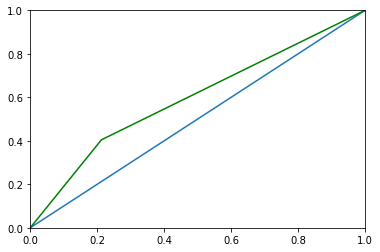

In [120]:
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(Y_test, y_pred_4)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot([0, 1], [0, 1])
plt.plot(false_positive_rate, true_positive_rate, 'g')

In [121]:
#calculating metrics

results_4={
    'Model' : 'KNN-Classifier',
    'Accuracy_Score' : metrics.accuracy_score(Y_test,y_pred_4),
    'Precison_Score' : metrics.precision_score(Y_test,y_pred_4),
    'Recall_Score' : metrics.recall_score(Y_test,y_pred_4),
    'AUC_score' : metrics.roc_auc_score(Y_test,y_pred_4),
    'F1-Score' : metrics.f1_score(Y_test,y_pred_4),
    'Kappa_score' : metrics.cohen_kappa_score(Y_test,y_pred_4)
}

results_4

{'Model': 'KNN-Classifier',
 'Accuracy_Score': 0.7142857142857143,
 'Precison_Score': 0.3090909090909091,
 'Recall_Score': 0.40476190476190477,
 'AUC_score': 0.5959383753501399,
 'F1-Score': 0.3505154639175258,
 'Kappa_score': 0.171571696931747}

In [122]:
table=table.append(results_4,ignore_index=True)
table

,Model,Accuracy_Score,Precison_Score,Recall_Score,AUC_score,F1-Score,Kappa_score
0,LogisticRegression,0.759637,0.426667,0.761905,0.760504,0.547009,0.400646
1,DecisionTreeClassifier,0.770975,0.389610,0.357143,0.612745,0.372671,0.232911
2,RandomForestClassifier,0.820862,0.527473,0.571429,0.725490,0.548571,0.437055
3,KNN-Classifier,0.714286,0.309091,0.404762,0.595938,0.350515,0.171572


## Bagging Classifier


In [123]:
model_5=BaggingClassifier(random_state=10)
model_5=model_5.fit(X_train_smote,Y_train_smote)
y_pred_5=model_5.predict(X_test)
y_pred_5

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [124]:
print(metrics.classification_report(Y_test,y_pred_5))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       357
           1       0.54      0.30      0.38        84

    accuracy                           0.82       441
   macro avg       0.70      0.62      0.64       441
weighted avg       0.79      0.82      0.80       441



In [125]:
print(metrics.confusion_matrix(Y_test,y_pred_5))

[[336  21]
 [ 59  25]]


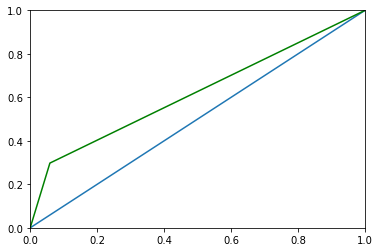

In [126]:
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(Y_test, y_pred_5)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot([0, 1], [0, 1])
plt.plot(false_positive_rate, true_positive_rate, 'g')

In [127]:
results_5={
    'Model' : 'BaggingClassifier',
    'Accuracy_Score' : metrics.accuracy_score(Y_test,y_pred_5),
    'Precison_Score' : metrics.precision_score(Y_test,y_pred_5),
    'Recall_Score' : metrics.recall_score(Y_test,y_pred_5),
    'AUC_score' : metrics.roc_auc_score(Y_test,y_pred_5),
    'F1-Score' : metrics.f1_score(Y_test,y_pred_5),
    'Kappa_score' : metrics.cohen_kappa_score(Y_test,y_pred_5)
}

results_5

{'Model': 'BaggingClassifier',
 'Accuracy_Score': 0.81859410430839,
 'Precison_Score': 0.5434782608695652,
 'Recall_Score': 0.2976190476190476,
 'AUC_score': 0.6193977591036415,
 'F1-Score': 0.3846153846153845,
 'Kappa_score': 0.2887383573243014}

In [128]:
table=table.append(results_5,ignore_index=True)
table

,Model,Accuracy_Score,Precison_Score,Recall_Score,AUC_score,F1-Score,Kappa_score
0,LogisticRegression,0.759637,0.426667,0.761905,0.760504,0.547009,0.400646
1,DecisionTreeClassifier,0.770975,0.389610,0.357143,0.612745,0.372671,0.232911
2,RandomForestClassifier,0.820862,0.527473,0.571429,0.725490,0.548571,0.437055
3,KNN-Classifier,0.714286,0.309091,0.404762,0.595938,0.350515,0.171572
4,BaggingClassifier,0.818594,0.543478,0.297619,0.619398,0.384615,0.288738


In [129]:
threshold=0.45
predicted_5=model_5.predict_proba(X_test)
predicted_5 = (predicted_5 [:,1] >= threshold).astype('int')
    
print(predicted_5)

[0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1
 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1]


In [130]:
print(metrics.classification_report(Y_test,predicted_5))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89       357
           1       0.52      0.39      0.45        84

    accuracy                           0.81       441
   macro avg       0.69      0.65      0.67       441
weighted avg       0.80      0.81      0.80       441



## AdaBoost

In [131]:
model_6=AdaBoostClassifier(random_state=10)
model_6=model_6.fit(X_train_smote,Y_train_smote)
y_pred_6=model_6.predict(X_test)
y_pred_6

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [132]:
print(metrics.classification_report(Y_train_smote,model_6.predict(X_train_smote)))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       876
           1       0.92      0.92      0.92       876

    accuracy                           0.92      1752
   macro avg       0.92      0.92      0.92      1752
weighted avg       0.92      0.92      0.92      1752



In [133]:
print(metrics.classification_report(Y_test,y_pred_6)) #without gridsearch

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       357
           1       0.56      0.57      0.56        84

    accuracy                           0.83       441
   macro avg       0.73      0.73      0.73       441
weighted avg       0.83      0.83      0.83       441



In [134]:
print(metrics.confusion_matrix(Y_test,y_pred_6))

[[319  38]
 [ 36  48]]


In [135]:
results_6={
    'Model' : 'AdaBoostClassifier',
    'Accuracy_Score' : metrics.accuracy_score(Y_test,y_pred_6),
    'Precison_Score' : metrics.precision_score(Y_test,y_pred_6),
    'Recall_Score' : metrics.recall_score(Y_test,y_pred_6),
    'AUC_score' : metrics.roc_auc_score(Y_test,y_pred_6),
    'F1-Score' : metrics.f1_score(Y_test,y_pred_6),
    'Kappa_score' : metrics.cohen_kappa_score(Y_test,y_pred_6)
}

results_6

{'Model': 'AdaBoostClassifier',
 'Accuracy_Score': 0.8321995464852607,
 'Precison_Score': 0.5581395348837209,
 'Recall_Score': 0.5714285714285714,
 'AUC_score': 0.7324929971988795,
 'F1-Score': 0.5647058823529412,
 'Kappa_score': 0.46079111727966693}

In [136]:
table=table.append(results_6,ignore_index=True)
table

,Model,Accuracy_Score,Precison_Score,Recall_Score,AUC_score,F1-Score,Kappa_score
0,LogisticRegression,0.759637,0.426667,0.761905,0.760504,0.547009,0.400646
1,DecisionTreeClassifier,0.770975,0.389610,0.357143,0.612745,0.372671,0.232911
2,RandomForestClassifier,0.820862,0.527473,0.571429,0.725490,0.548571,0.437055
3,KNN-Classifier,0.714286,0.309091,0.404762,0.595938,0.350515,0.171572
4,BaggingClassifier,0.818594,0.543478,0.297619,0.619398,0.384615,0.288738
5,AdaBoostClassifier,0.832200,0.558140,0.571429,0.732493,0.564706,0.460791


As parameters seems good for adaboost, choosing adaboost for model deployment

# XGBOOST


In [137]:
import xgboost as xgb
model_7 = xgb.XGBClassifier()
model_7=model_7.fit(X_train_smote,Y_train_smote)
y_pred_7=model_7.predict(X_test)
y_pred_7

C:\Users\Reby Varghese\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d

[13:34:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [138]:
print(metrics.classification_report(Y_test,y_pred_7))
print(metrics.confusion_matrix(Y_test,y_pred_7))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       357
           1       0.62      0.31      0.41        84

    accuracy                           0.83       441
   macro avg       0.74      0.63      0.66       441
weighted avg       0.81      0.83      0.81       441

[[341  16]
 [ 58  26]]


In [139]:
results_7={
    'Model' : 'XGBoostClassifier',
    'Accuracy_Score' : metrics.accuracy_score(Y_test,y_pred_7),
    'Precison_Score' : metrics.precision_score(Y_test,y_pred_7),
    'Recall_Score' : metrics.recall_score(Y_test,y_pred_7),
    'AUC_score' : metrics.roc_auc_score(Y_test,y_pred_7),
    'F1-Score' : metrics.f1_score(Y_test,y_pred_7),
    'Kappa_score' : metrics.cohen_kappa_score(Y_test,y_pred_7)
}

results_7

{'Model': 'XGBoostClassifier',
 'Accuracy_Score': 0.8321995464852607,
 'Precison_Score': 0.6190476190476191,
 'Recall_Score': 0.30952380952380953,
 'AUC_score': 0.6323529411764707,
 'F1-Score': 0.41269841269841273,
 'Kappa_score': 0.32727272727272727}

In [143]:
table=table.append(results_7,ignore_index=True)
table

,Model,Accuracy_Score,Precison_Score,Recall_Score,AUC_score,F1-Score,Kappa_score
0,LogisticRegression,0.759637,0.426667,0.761905,0.760504,0.547009,0.400646
1,DecisionTreeClassifier,0.770975,0.389610,0.357143,0.612745,0.372671,0.232911
2,RandomForestClassifier,0.820862,0.527473,0.571429,0.725490,0.548571,0.437055
3,KNN-Classifier,0.714286,0.309091,0.404762,0.595938,0.350515,0.171572
4,BaggingClassifier,0.818594,0.543478,0.297619,0.619398,0.384615,0.288738
5,AdaBoostClassifier,0.832200,0.558140,0.571429,0.732493,0.564706,0.460791
6,AdaBoostClassifier,0.832200,0.558140,0.571429,0.732493,0.564706,0.460791
7,XGBoostClassifier,0.832200,0.619048,0.309524,0.632353,0.412698,0.327273
